In [33]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

print(plt.style.available)
plt.style.use('bmh')

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'petroff10', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [34]:
# Rad data
df = pd.read_excel(r"C:\Masterpiece By Nickopusan\Document\Movie data.xlsx")
df.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,Release Date,Movie,no,Production Budget,Domestic Gross,Worldwide Gross
1,"Dec 16, 2015",Star Wars Ep. VII: The Force Awakens,1,"$533,200,000","$936,662,225","$2,056,046,835"
2,"Apr 23, 2019",Avengers: Endgame,2,"$400,000,000","$858,373,000","$2,748,242,781"
3,"Dec 9, 2022",Avatar: The Way of Water,3,"$400,000,000","$684,075,767","$2,312,413,227"
4,"May 21, 2025",Mission: Impossible—The Final Reckoning,4,"$400,000,000",$0,$0


In [35]:
# Set the first row as the header
df.columns = df.iloc[0]
df = df[1:]
df.reset_index(drop=True, inplace=True)
df.head()

,Release Date,Movie,no,Production Budget,Domestic Gross,Worldwide Gross
0,"Dec 16, 2015",Star Wars Ep. VII: The Force Awakens,1,"$533,200,000","$936,662,225","$2,056,046,835"
1,"Apr 23, 2019",Avengers: Endgame,2,"$400,000,000","$858,373,000","$2,748,242,781"
2,"Dec 9, 2022",Avatar: The Way of Water,3,"$400,000,000","$684,075,767","$2,312,413,227"
3,"May 21, 2025",Mission: Impossible—The Final Reckoning,4,"$400,000,000",$0,$0
4,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,5,"$379,000,000","$241,071,802","$1,045,713,802"


In [36]:
# Drop 'no'
df.drop('no', axis=1, inplace=True)
df.head()

,Release Date,Movie,Production Budget,Domestic Gross,Worldwide Gross
0,"Dec 16, 2015",Star Wars Ep. VII: The Force Awakens,"$533,200,000","$936,662,225","$2,056,046,835"
1,"Apr 23, 2019",Avengers: Endgame,"$400,000,000","$858,373,000","$2,748,242,781"
2,"Dec 9, 2022",Avatar: The Way of Water,"$400,000,000","$684,075,767","$2,312,413,227"
3,"May 21, 2025",Mission: Impossible—The Final Reckoning,"$400,000,000",$0,$0
4,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$379,000,000","$241,071,802","$1,045,713,802"


In [37]:
# Reorder columns
df = df[['Movie', 'Release Date', 'Production Budget', 'Domestic Gross', 'Worldwide Gross']]
df.head()

,Movie,Release Date,Production Budget,Domestic Gross,Worldwide Gross
0,Star Wars Ep. VII: The Force Awakens,"Dec 16, 2015","$533,200,000","$936,662,225","$2,056,046,835"
1,Avengers: Endgame,"Apr 23, 2019","$400,000,000","$858,373,000","$2,748,242,781"
2,Avatar: The Way of Water,"Dec 9, 2022","$400,000,000","$684,075,767","$2,312,413,227"
3,Mission: Impossible—The Final Reckoning,"May 21, 2025","$400,000,000",$0,$0
4,Pirates of the Caribbean: On Stranger Tides,"May 20, 2011","$379,000,000","$241,071,802","$1,045,713,802"


In [38]:
df

,Movie,Release Date,Production Budget,Domestic Gross,Worldwide Gross
0,Star Wars Ep. VII: The Force Awakens,"Dec 16, 2015","$533,200,000","$936,662,225","$2,056,046,835"
1,Avengers: Endgame,"Apr 23, 2019","$400,000,000","$858,373,000","$2,748,242,781"
2,Avatar: The Way of Water,"Dec 9, 2022","$400,000,000","$684,075,767","$2,312,413,227"
3,Mission: Impossible—The Final Reckoning,"May 21, 2025","$400,000,000",$0,$0
4,Pirates of the Caribbean: On Stranger Tides,"May 20, 2011","$379,000,000","$241,071,802","$1,045,713,802"
...,...,...,...,...,...
1385,Following,"Apr 2, 1999","$6,000","$48,482","$240,495"
1386,Return to the Land of Wonders,"Jul 13, 2005","$5,000","$1,338","$1,338"
1387,A Plague So Pleasant,"Sep 29, 2015","$1,400",$0,$0
1388,My Date With Drew,"Aug 5, 2005","$1,100","$181,041","$181,041"


In [39]:
# Checking null value
df.isnull().sum()

0
Movie                0
Release Date         0
Production Budget    0
Domestic Gross       0
Worldwide Gross      0
dtype: int64

In [40]:
# Checking duplicate items
df.duplicated().sum()

np.int64(0)

In [41]:
# Check Unknown in Realease Date
(df['Release Date'] == 'Unknown').sum()

np.int64(34)

In [42]:
# Check data type
df.dtypes

0
Movie                object
Release Date         object
Production Budget    object
Domestic Gross       object
Worldwide Gross      object
dtype: object

In [43]:
# Change data type to float
df['Production Budget'] = df['Production Budget'].replace('[\$,]','',regex=True).astype(float)
df['Domestic Gross'] = df['Domestic Gross'].replace('[\$,]', '', regex=True).astype(float)
df['Worldwide Gross'] = df['Worldwide Gross'].replace('[\$,]', '', regex=True).astype(float)
df.dtypes

<>:2: SyntaxWarning: invalid escape sequence '\$'
<>:3: SyntaxWarning: invalid escape sequence '\$'
<>:4: SyntaxWarning: invalid escape sequence '\$'
<>:2: SyntaxWarning: invalid escape sequence '\$'
<>:3: SyntaxWarning: invalid escape sequence '\$'
<>:4: SyntaxWarning: invalid escape sequence '\$'
C:\Users\mochw\AppData\Local\Temp\ipykernel_6340\3460769584.py:2: SyntaxWarning: invalid escape sequence '\$'
  df['Production Budget'] = df['Production Budget'].replace('[\$,]','',regex=True).astype(float)
C:\Users\mochw\AppData\Local\Temp\ipykernel_6340\3460769584.py:3: SyntaxWarning: invalid escape sequence '\$'
  df['Domestic Gross'] = df['Domestic Gross'].replace('[\$,]', '', regex=True).astype(float)
C:\Users\mochw\AppData\Local\Temp\ipykernel_6340\3460769584.py:4: SyntaxWarning: invalid escape sequence '\$'
  df['Worldwide Gross'] = df['Worldwide Gross'].replace('[\$,]', '', regex=True).astype(float)


0
Movie                 object
Release Date          object
Production Budget    float64
Domestic Gross       float64
Worldwide Gross      float64
dtype: object

In [44]:
# Check zero domestic gross + worldwide gross
zero_gross = df[(df['Domestic Gross'] == 0) & (df['Worldwide Gross'] == 0)]
zero_gross

,Movie,Release Date,Production Budget,Domestic Gross,Worldwide Gross
3,Mission: Impossible—The Final Reckoning,"May 21, 2025",400000000.0,0.0,0.0
16,Jurassic World Rebirth,"Jul 2, 2025",265000000.0,0.0,0.0
34,Avatar: Fire and Ash,"Dec 17, 2025",250000000.0,0.0,0.0
127,Artemis Fowl,"Jun 12, 2020",100000000.0,0.0,0.0
128,Predator: Badlands,"Nov 5, 2025",100000000.0,0.0,0.0
...,...,...,...,...,...
1372,Tin Can Man,Unknown,12000.0,0.0,0.0
1379,Family Motocross,"May 19, 2015",10000.0,0.0,0.0
1384,Red 11,"Mar 1, 2022",7000.0,0.0,0.0
1387,A Plague So Pleasant,"Sep 29, 2015",1400.0,0.0,0.0


In [45]:
# Delete zero gross
df = df[(df['Domestic Gross'] != 0) | (df['Worldwide Gross'] != 0)]

In [46]:
# Delete Unknown in Release Date
df = df[df['Release Date'] != 'Unknown']

In [47]:
# Making Year Column
df['Year'] = df['Release Date'].astype(str).str[-4:]
df.head()

,Movie,Release Date,Production Budget,Domestic Gross,Worldwide Gross,Year
0,Star Wars Ep. VII: The Force Awakens,"Dec 16, 2015",533200000.0,936662225.0,2.056047e+09,2015
1,Avengers: Endgame,"Apr 23, 2019",400000000.0,858373000.0,2.748243e+09,2019
2,Avatar: The Way of Water,"Dec 9, 2022",400000000.0,684075767.0,2.312413e+09,2022
4,Pirates of the Caribbean: On Stranger Tides,"May 20, 2011",379000000.0,241071802.0,1.045714e+09,2011
5,Avengers: Age of Ultron,"Apr 22, 2015",365000000.0,459005868.0,1.395317e+09,2015


In [48]:
# Making Total Gross Column
df['Total Gross'] = df['Production Budget'] + df['Worldwide Gross'].astype(float)

In [49]:
# Sort by Total Gross
df = df.sort_values(by=['Total Gross'], inplace=False, ascending=False)
df

,Movie,Release Date,Production Budget,Domestic Gross,Worldwide Gross,Year,Total Gross
36,Avatar,"Dec 17, 2009",237000000.0,785221649.0,2.923706e+09,2009,3.160706e+09
1,Avengers: Endgame,"Apr 23, 2019",400000000.0,858373000.0,2.748243e+09,2019,3.148243e+09
2,Avatar: The Way of Water,"Dec 9, 2022",400000000.0,684075767.0,2.312413e+09,2022,2.712413e+09
0,Star Wars Ep. VII: The Force Awakens,"Dec 16, 2015",533200000.0,936662225.0,2.056047e+09,2015,2.589247e+09
61,Titanic,"Dec 18, 1997",200000000.0,674460013.0,2.223049e+09,1997,2.423049e+09
...,...,...,...,...,...,...,...
1371,Grip: A Criminal's Story,"Apr 28, 2006",12000.0,1336.0,1.336000e+03,2006,1.333600e+04
1376,On the Downlow,"May 28, 2004",10000.0,1987.0,1.987000e+03,2004,1.198700e+04
1377,Bang,"Apr 1, 1996",10000.0,527.0,5.270000e+02,1996,1.052700e+04
1378,The Rise and Fall of Miss Thang,"Aug 14, 2008",10000.0,401.0,4.010000e+02,2008,1.040100e+04


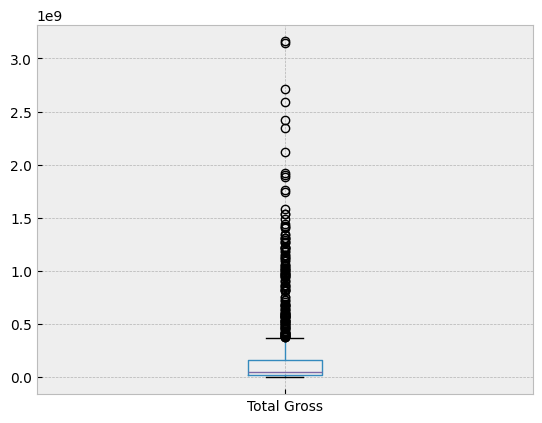

In [50]:
# Checking outliers
df.boxplot(column=['Total Gross'])
plt.show()

In [51]:
# Removing Outliers
z_scores = stats.zscore(df['Total Gross'])
z_scores_df = np.abs(z_scores)
filtered_entries = (z_scores_df < 3)
df = df[filtered_entries]

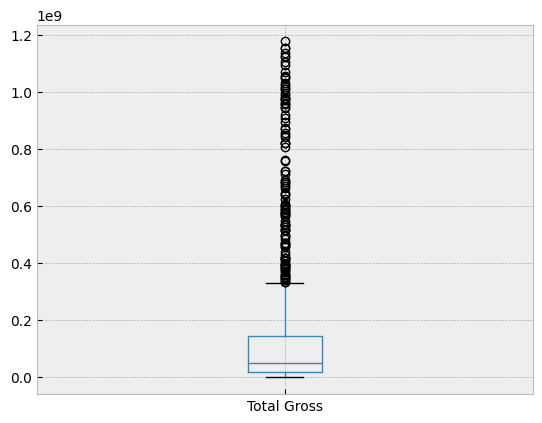

In [52]:
# Clean
df.boxplot(column=['Total Gross'])
plt.show()

In [53]:
# Checking correlation between budget and gross
correlation = df['Production Budget'].corr(df['Total Gross'])
print(f"Correlation Coefficient: {correlation:.2f}")

Correlation Coefficient: 0.86


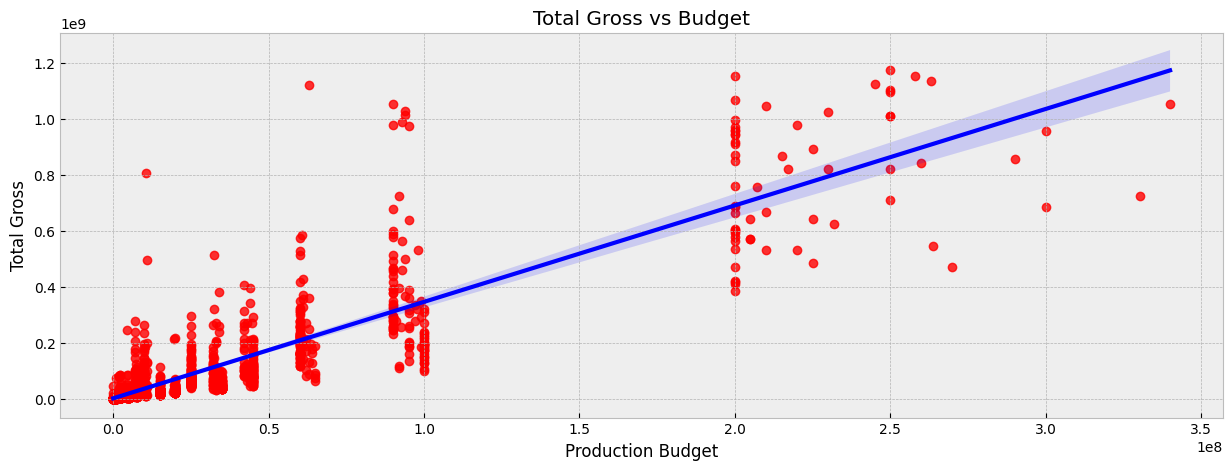

In [54]:
# Gross vs Budget
plt.figure(figsize=(15, 5))
sns.regplot(x='Production Budget', y='Total Gross', data=df, scatter_kws={'color': 'red'}, line_kws={'color': 'blue'}).set_title("Total Gross vs Budget")
plt.show()

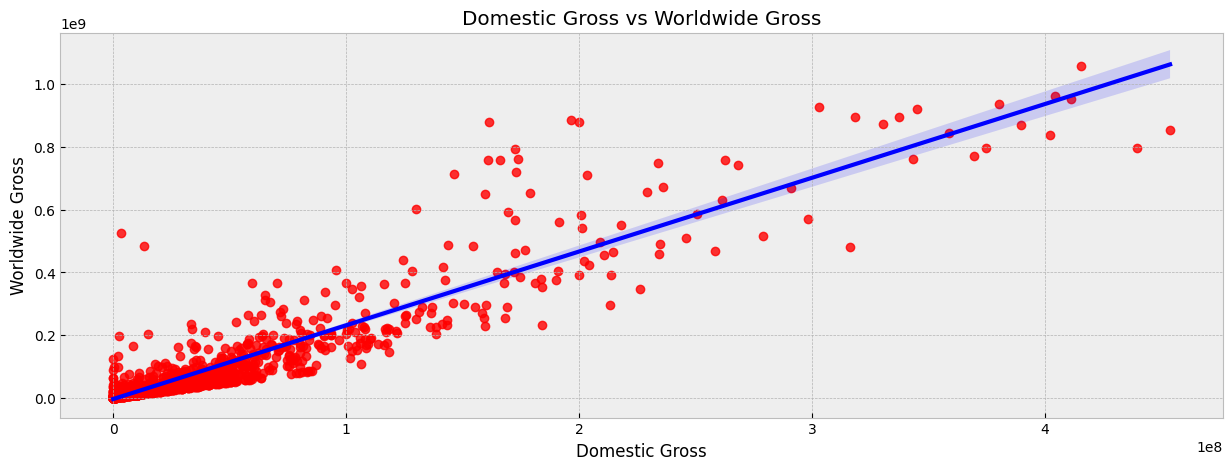

In [55]:
plt.figure(figsize=(15, 5))
sns.regplot(x='Domestic Gross', y='Worldwide Gross', data=df, scatter_kws={'color': 'red'}, line_kws={'color': 'blue'}).set_title("Domestic Gross vs Worldwide Gross")
plt.show()

C:\Users\mochw\AppData\Local\Temp\ipykernel_6340\1451490441.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Gross Minus Budget'] = df['Total Gross'] - df['Production Budget']
C:\Users\mochw\AppData\Local\Temp\ipykernel_6340\1451490441.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Gross Minus Budget', y='Movie', data=df.head(10), palette=colors)


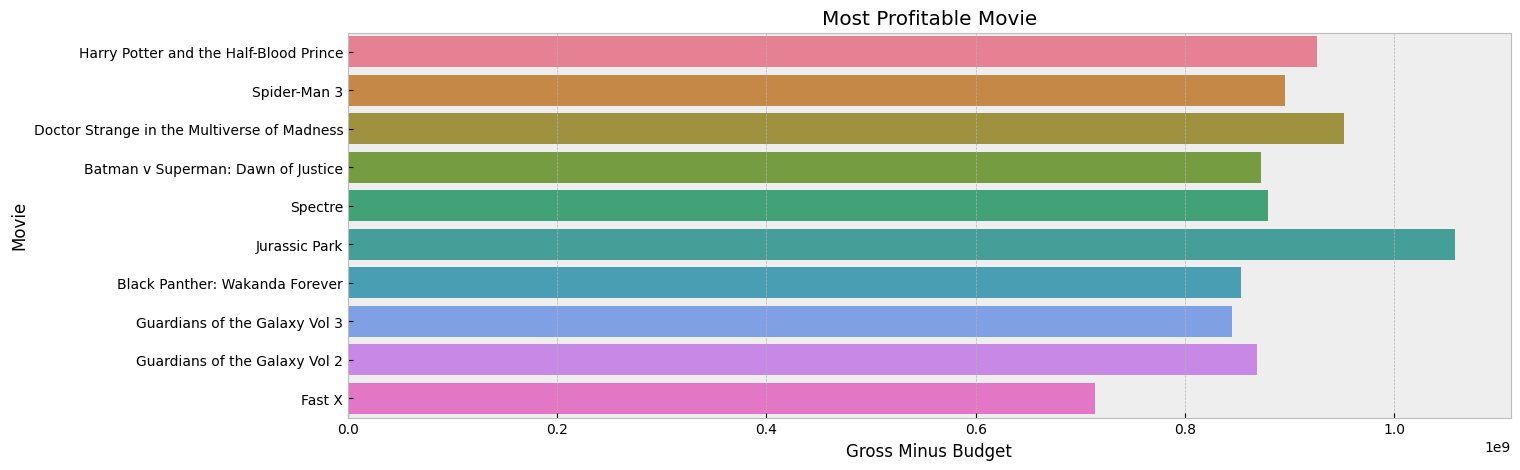

In [56]:
# Top 10 profitable movie
df['Gross Minus Budget'] = df['Total Gross'] - df['Production Budget']
colors = sns.color_palette('husl', 10)
plt.figure(figsize=(15, 5))
plt.xticks(rotation=0)
sns.barplot(x='Gross Minus Budget', y='Movie', data=df.head(10), palette=colors)
plt.title('Most Profitable Movie')
plt.show()

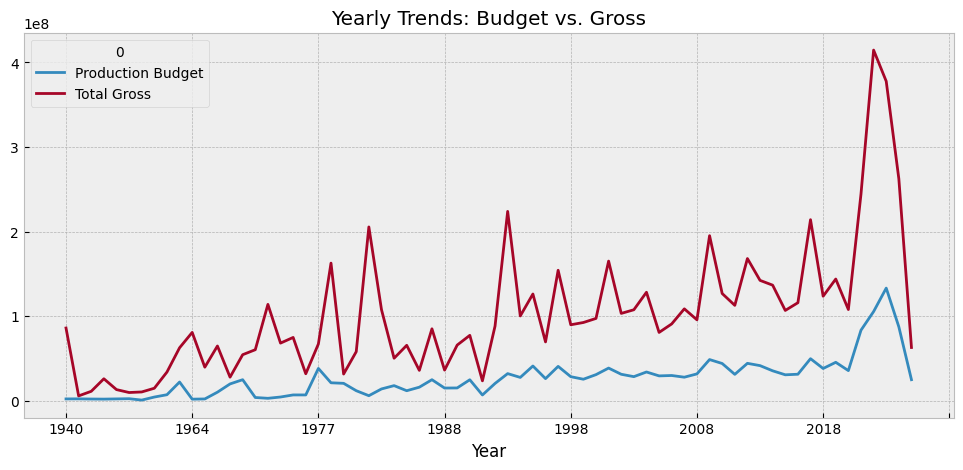

In [57]:
# Yearly Trends
df.groupby('Year')[['Production Budget', 'Total Gross']].mean().plot(figsize=(12,5))
plt.title("Yearly Trends: Budget vs. Gross")
plt.show()

C:\Users\mochw\AppData\Local\Temp\ipykernel_6340\35534588.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['International Gross'] = df['Worldwide Gross'] - df['Domestic Gross']


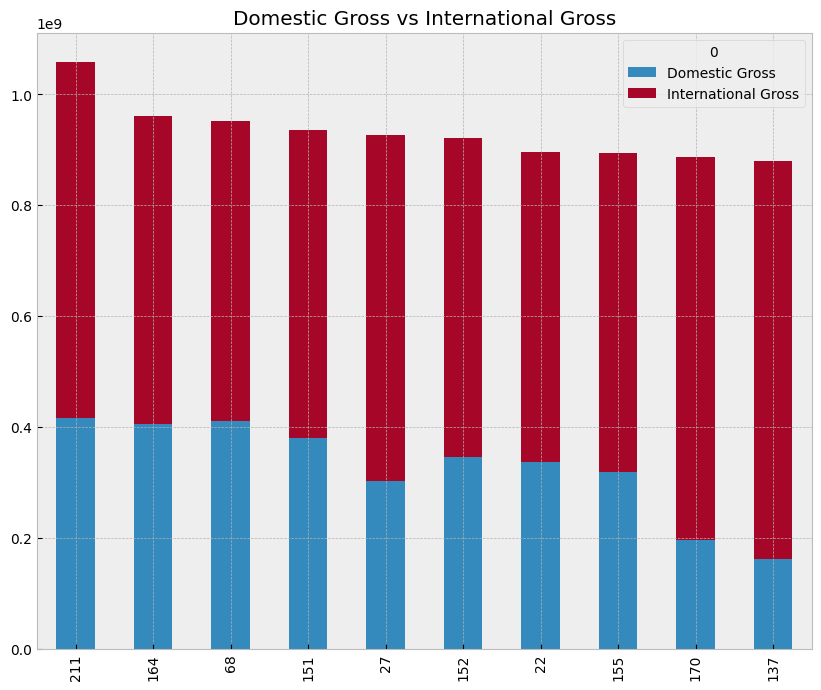

In [66]:
df['International Gross'] = df['Worldwide Gross'] - df['Domestic Gross']
top_movies = df.nlargest(10, 'Worldwide Gross')
top_movies[['Domestic Gross', 'International Gross']].plot(kind='bar', stacked=True, figsize=(10, 8))
plt.title('Domestic Gross vs International Gross')
plt.show()